In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv('transaction_data.csv')

In [3]:
df1.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


Check the number of unique values in the features 

In [4]:
df1.nunique()

UserId                     4373
TransactionId             25900
TransactionTime           23260
ItemCode                   3407
ItemDescription            4223
NumberOfItemsPurchased      722
CostPerItem                1631
Country                      38
dtype: int64

Check the number of rows and columns in the data

In [5]:
df1.shape

(1083818, 8)

In [6]:
df1.drop_duplicates(inplace=True)

In [7]:
df1.shape

(536572, 8)

-1 can be people whose UserId's are not mentioned 

In [8]:
df1['UserId'].value_counts() .head(5)

-1         135003
 374661      7810
 313131      5898
 296016      5128
 267708      4459
Name: UserId, dtype: int64

Removing these records for which user id's were not given as they cannot be segmented 

In [9]:
df1=df1[df1['UserId']!=-1]

Number of Null Values in the data 

In [10]:
df1.isnull().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
dtype: int64

### Visulisation of Country column 

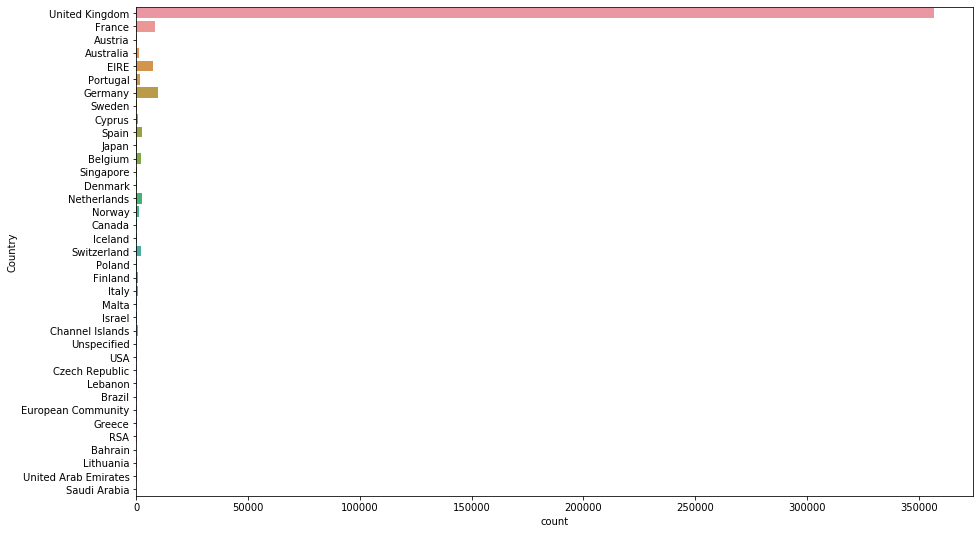

In [11]:
plt.figure(figsize=(15,9))
sns.countplot(y='Country', data=df1) 

Only people with Countory U.K were taken as they were more than 90%

In [12]:
df1 = df1[df1.Country.isin(['United Kingdom'])]

Check shape after dropping other countries 

In [13]:
df1.shape

(356695, 8)

We can see there are some negative values coming which are just '-' used while seperate quantity 

In [14]:
df1[df1['NumberOfItemsPurchased']<0]['NumberOfItemsPurchased'].head()

69     -3
135   -24
329    -3
353   -15
483   -36
Name: NumberOfItemsPurchased, dtype: int64

In [15]:
df1[df1['NumberOfItemsPurchased']<0]['CostPerItem'].head()

69      2.90
135    17.60
329    15.12
353    15.12
483     2.01
Name: CostPerItem, dtype: float64

Converted these negative values into positive 

In [16]:
df1['NumberOfItemsPurchased']=df1['NumberOfItemsPurchased'].apply(abs)

In [17]:
df1[df1['NumberOfItemsPurchased']<0] 

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


Cost per item not mentioned for these products 

In [18]:
df1[df1['CostPerItem']==0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
5544,274701,6331369,Tue Jan 22 07:49:00 IST 2019,463869,PAPER BUNTING VINTAGE PAISLEY,72,0.0,United Kingdom
40452,302610,6037581,Sat Jun 16 10:42:00 IST 2018,465402,HEART GARLAND RUSTIC PADDED,6,0.0,United Kingdom
55106,353178,6174124,Sun Oct 07 08:24:00 IST 2018,465507,OVAL WALL MIRROR DIAMANTE,3,0.0,United Kingdom
67695,379239,6301823,Mon Jan 07 10:36:00 IST 2019,445368,PASTEL COLOUR HONEYCOMB FAN,15,0.0,United Kingdom
72163,371007,6083000,Tue Jul 24 11:21:00 IST 2018,998886,PARTY BUNTING,12,0.0,United Kingdom
88638,273294,6323669,Sat Jan 19 09:22:00 IST 2019,475125,RED KITCHEN SCALES,6,0.0,United Kingdom
95155,327642,6348419,Tue Jan 29 15:52:00 IST 2019,471744,HANGING METAL HEART LANTERN,12,0.0,United Kingdom
130160,347760,5931893,Tue Feb 27 10:36:00 IST 2018,474180,ADVENT CALENDAR GINGHAM SACK,12,0.0,United Kingdom
157919,296310,6315925,Tue Jan 15 07:47:00 IST 2019,463365,CHRISTMAS PUDDING TRINKET POT,36,0.0,United Kingdom
158382,278376,6367251,Wed Feb 06 11:57:00 IST 2019,1781346,ASSTD DESIGN 3D PAPER STICKERS,37620,0.0,United Kingdom


Removing these records 

In [19]:
df1=df1[df1['CostPerItem']!=0]

Checking if any negative records present for cost price also 

In [20]:
df1[df1['CostPerItem']<0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [21]:
df1['Total Purchase']=df1['NumberOfItemsPurchased']*df1['CostPerItem']

In [22]:
df1.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total Purchase
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24
6,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,61.56


In [23]:
df1.dtypes

UserId                      int64
TransactionId               int64
TransactionTime            object
ItemCode                    int64
ItemDescription            object
NumberOfItemsPurchased      int64
CostPerItem               float64
Country                    object
Total Purchase            float64
dtype: object

Date has object data type which should be converted into date time format 

### Date Treatment 

In [24]:
list1=df1['TransactionTime'].str.split()


In [25]:
newlist=[]
for i in list1:
    newlist.append(i[3])
list1.head()

0    [Sat, Feb, 02, 12:50:00, IST, 2019]
1    [Wed, Dec, 26, 09:06:00, IST, 2018]
3    [Fri, Jun, 22, 07:14:00, IST, 2018]
5    [Fri, Jan, 11, 09:50:00, IST, 2019]
6    [Fri, Sep, 28, 10:51:00, IST, 2018]
Name: TransactionTime, dtype: object

In [26]:
df1['Time']=newlist

In [27]:
newlist1=[]
for i in list1:
    newlist1.append(i[1])

In [28]:
from time import strptime

In [29]:
monthsno=[]
for i in np.arange(len(newlist1)):
    monthsno.append(strptime(newlist1[i],'%b').tm_mon)
    

In [30]:
days=[]
for i in list1:
    days.append(i[2])

In [31]:
years=[]
for i in list1:
    years.append(i[5])

In [32]:
date=pd.DataFrame({'Years':years,
             'Months':monthsno,
             'Day':days})

In [33]:
date['Years'].value_counts()

2018    263876
2019     91787
2028      1008
Name: Years, dtype: int64

In [34]:
date['Years']=date['Years'].replace({'2028':'2018'})

In [35]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356671 entries, 0 to 356670
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Years   356671 non-null  object
 1   Months  356671 non-null  int64 
 2   Day     356671 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.2+ MB


In [36]:
date['Months']=date['Months'].astype('object')

In [37]:
date['date1']=date[['Years','Months','Day']].apply(lambda x : '{}-{}-{}'.format(x[0],x[1],x[2]), axis=1)

In [38]:
date['date1'].isnull().sum()

0

In [39]:
date.shape

(356671, 4)

In [40]:
df1.shape

(356671, 10)

In [41]:
date.isnull().sum()

Years     0
Months    0
Day       0
date1     0
dtype: int64

In [42]:
date['date1'].head()

0     2019-2-02
1    2018-12-26
2     2018-6-22
3     2019-1-11
4     2018-9-28
Name: date1, dtype: object

In [43]:
df1['date1']=list(date['date1'])

In [44]:
df1.isnull().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
Total Purchase            0
Time                      0
date1                     0
dtype: int64

In [45]:
df1['date_time']=df1[['date1','Time']].apply(lambda x : "{} {}".format(x[0],x[1]), axis=1)

In [46]:
df1.drop(['TransactionTime','Time','date1'],axis=1,inplace=True)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356671 entries, 0 to 1081376
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  356671 non-null  int64  
 1   TransactionId           356671 non-null  int64  
 2   ItemCode                356671 non-null  int64  
 3   ItemDescription         356671 non-null  object 
 4   NumberOfItemsPurchased  356671 non-null  int64  
 5   CostPerItem             356671 non-null  float64
 6   Country                 356671 non-null  object 
 7   Total Purchase          356671 non-null  float64
 8   date_time               356671 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 27.2+ MB


In [48]:
df1['date_time']=pd.to_datetime(df1['date_time'])

Range of dates 

In [49]:
df1['date_time'].min(), df1['date_time'].max()# Range of Time 

(Timestamp('2018-02-12 04:26:00'), Timestamp('2019-02-20 08:49:00'))

### Making a new DataFrame for Users

In [50]:
userdf = pd.DataFrame({"UserId":df1['UserId'].unique()})

In [51]:
userdf.head()

,UserId
0,278166
1,337701
2,380478
3,285957
4,345954


# Recency 

In [52]:
df1['Recency']= (df1['date_time'].max() - pd.to_datetime(df1['date_time'])).dt.days

In [53]:
recency_df = df1.groupby('UserId')[['Recency']].min().reset_index()
recency_df.head()

,UserId,Recency
0,259266,325
1,267687,1
2,267708,0
3,267729,3
4,269220,2


In [54]:
userdf = userdf.merge(recency_df, left_on='UserId', right_on='UserId')
userdf.head()

,UserId,Recency
0,278166,17
1,337701,55
2,380478,10
3,285957,39
4,345954,6


### Frequency Aspect

In [55]:
Frequency=df1.groupby('UserId')[['TransactionId']].count().reset_index()
Frequency.head()

,UserId,TransactionId
0,259266,2
1,267687,103
2,267708,4458
3,267729,231
4,269220,59


In [56]:
userdf = userdf.merge(Frequency, left_on='UserId', right_on='UserId')
userdf.head()

,UserId,Recency,TransactionId
0,278166,17,138
1,337701,55,223
2,380478,10,1268
3,285957,39,44
4,345954,6,345


### Monetory Aspect

In [57]:
# Total Purchase made by any customer 

In [58]:
monetary = df1.groupby('UserId')[['Total Purchase']].sum().reset_index()
monetary.head()

,UserId,Total Purchase
0,259266,641217.60
1,267687,17392.89
2,267708,156397.83
3,267729,17880.12
4,269220,3910.62


In [59]:
monetary['Total Purchase']=monetary['Total Purchase'].apply(lambda x: round(x, 3))
monetary.head()

,UserId,Total Purchase
0,259266,641217.60
1,267687,17392.89
2,267708,156397.83
3,267729,17880.12
4,269220,3910.62


In [60]:
userdf = userdf.merge(monetary, left_on='UserId', right_on='UserId')

In [61]:
userdf.rename({'TransactionId':'Frequency',
              'Total Purchase':'Monetary'},axis=1,inplace=True)

In [62]:
userdf.head()

,UserId,Recency,Frequency,Monetary
0,278166,17,138,8420.43
1,337701,55,223,11615.97
2,380478,10,1268,23576.67
3,285957,39,44,2256.90
4,345954,6,345,7760.67


In [63]:
userdf['Rank'] = userdf['Monetary'].rank(ascending=False)

In [64]:
userdf.sort_values('Rank',ascending=True).head()

,UserId,Recency,Frequency,Monetary,Rank
3883,288687,373,1,40710850.56,1.0
3811,345366,0,4,1399605.63,2.0
542,380142,0,433,1089519.96,3.0
222,366450,7,350,835192.89,4.0
3864,259266,325,2,641217.60,5.0


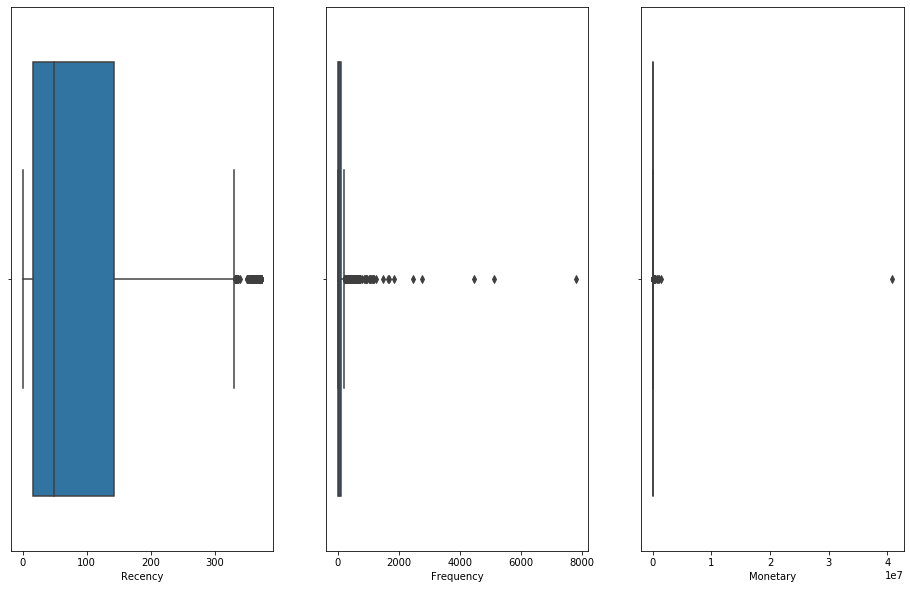

In [65]:
fig,axes=plt.subplots(1,3,figsize=(16,10))
sns.boxplot(userdf['Recency'],ax=axes[0])
sns.boxplot(userdf['Frequency'],ax=axes[1])
sns.boxplot(userdf['Monetary'],ax=axes[2])
plt.show()

In [66]:
quantiles = userdf.iloc[:,1:].quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,16.0,17.0,1241.16,988.0
0.50,49.0,41.0,2697.45,1975.0
0.75,142.0,99.0,6672.66,2962.0


In [67]:
def Recency_rating(v,p,q):
    if v <= q[p][0.25]:
        return 4
    elif v <= q[p][0.50]:
        return 3
    elif v <= q[p][0.75]: 
        return 2
    else:
        return 1
def Fre_Mon_Rating(v,p,q):
    if v <= q[p][0.25]:
        return 1
    elif v <= q[p][0.50]:
        return 2
    elif v <= q[p][0.75]: 
        return 3
    else:
        return 4

In [68]:
userdf['R_Ratings'] = userdf['Recency'].apply(Recency_rating, args=('Recency',quantiles,))
userdf['F_Ratings'] = userdf['Frequency'].apply(Fre_Mon_Rating, args=('Frequency',quantiles,))
userdf['M_Ratings'] = userdf['Monetary'].apply(Fre_Mon_Rating, args=('Monetary',quantiles,))

In [69]:
userdf.head()

,UserId,Recency,Frequency,Monetary,Rank,R_Ratings,F_Ratings,M_Ratings
0,278166,17,138,8420.43,771.0,3,4,4
1,337701,55,223,11615.97,522.0,2,4,4
2,380478,10,1268,23576.67,195.0,4,4,4
3,285957,39,44,2256.90,2208.0,3,3,2
4,345954,6,345,7760.67,842.0,4,4,4


In [70]:
userdf['RFMRatings'] = userdf['R_Ratings'].map(str) \
                            + userdf['F_Ratings'].map(str) \
                            + userdf['M_Ratings'].map(str)
userdf.head()

,UserId,Recency,Frequency,Monetary,Rank,R_Ratings,F_Ratings,M_Ratings,RFMRatings
0,278166,17,138,8420.43,771.0,3,4,4,344
1,337701,55,223,11615.97,522.0,2,4,4,244
2,380478,10,1268,23576.67,195.0,4,4,4,444
3,285957,39,44,2256.90,2208.0,3,3,2,332
4,345954,6,345,7760.67,842.0,4,4,4,444


In [71]:
Top20=userdf.sort_values(by='Rank',ascending=True)[['Monetary','UserId']].head(20)

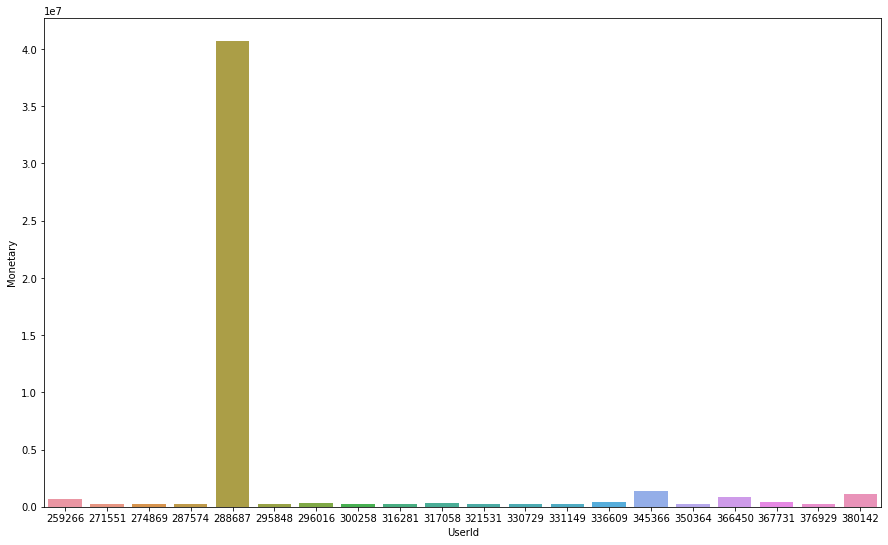

In [72]:
plt.figure(figsize=(15,9))
sns.barplot(Top20['UserId'],Top20['Monetary'])
plt.show()

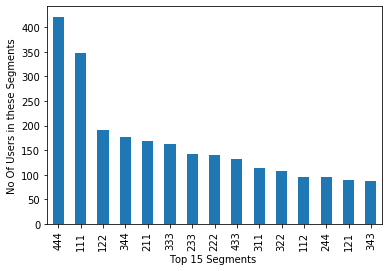

In [73]:
### plt.figure(figsize=(15,9))
userdf['RFMRatings'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Top 15 Segments ')
plt.ylabel('No Of Users in these Segments')
plt.show()

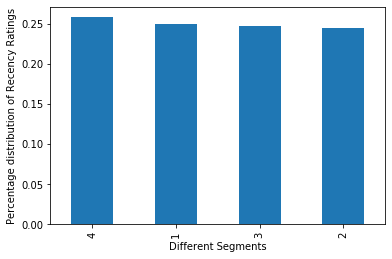

In [74]:
userdf['R_Ratings'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Different Segments')
plt.ylabel('Percentage distribution of Recency Ratings')
plt.show()

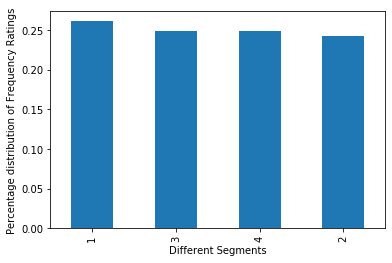

In [75]:
userdf['F_Ratings'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Different Segments')
plt.ylabel('Percentage distribution of Frequency Ratings')
plt.show()

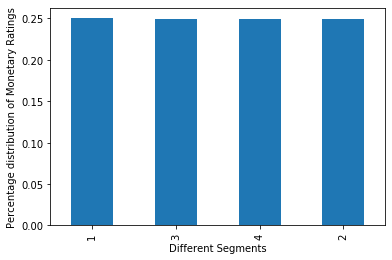

In [76]:
userdf['M_Ratings'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Different Segments')
plt.ylabel('Percentage distribution of Monetary Ratings')
plt.show()

Now as per my analysis I got these results and by this we will be able to know about different customers and how much loyal are they for the website and people who are not buying anymore and many othet groups. Through these analysis we get to know about which are the customers on which company has to spend or give them offers to retain them or people who are to be given rewards as to be loyal towards the comapny.

In [77]:
print('Best Customers Counts are:',userdf[userdf['RFMRatings']=='444']['RFMRatings'].count())

Best Customers Counts are: 422


In [78]:
print('Big Amount Customer Counts are:',userdf[userdf['M_Ratings']==4]['M_Ratings'].count())

Big Amount Customer Counts are: 987


In [79]:
print('Daily Loyal Customer Counts are:',userdf[userdf['F_Ratings']==4]['F_Ratings'].count())

Daily Loyal Customer Counts are: 981


In [80]:
print('Lost Customer Counts are:',userdf[userdf['F_Ratings']==1]['F_Ratings'].count())

Lost Customer Counts are: 1031


In [81]:
print('Rare visitors and no monetory expenditure Customer :',userdf[userdf['RFMRatings']=='111']['RFMRatings'].count())

Rare visitors and no monetory expenditure Customer : 347


In [82]:
print('Almost Lost: ', len(userdf[userdf['RFMRatings']=='244']))

Almost Lost:  95


In [83]:
print('Lost Customers: ',len(userdf[userdf['RFMRatings']=='144']))

Lost Customers:  20


In [84]:
# Some additional key analysis points which will help company to know about their trends

Creating a column naming Total sales because now we will analyse about the sales in different months 
Here total Purchases made by customers are the sales for the company 

In [85]:
date['Total Sales']=list(df1['Total Purchase'])

In [86]:
date.head()

,Years,Months,Day,date1,Total Sales
0,2019,2,02,2019-2-02,70.38
1,2018,12,26,2018-12-26,10.56
2,2018,6,22,2018-6-22,5.19
3,2019,1,11,2019-1-11,42.24
4,2018,9,28,2018-9-28,61.56


Maximum Sales in the month on Feb

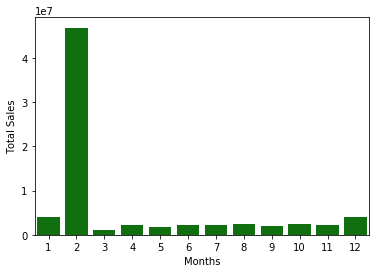

In [87]:
monthly_sales=date.groupby('Months')[['Total Sales']].sum().apply(lambda x: round(x, 3)).reset_index()
sns.barplot(x=monthly_sales['Months'],y=monthly_sales['Total Sales'],color='green')
plt.show()

### Top 5 Selling Items 

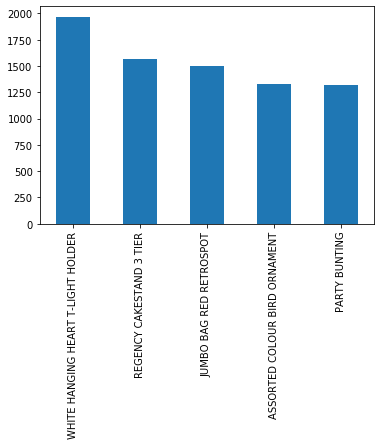

In [88]:
df1['ItemDescription'].value_counts().head(5).plot(kind='bar')
plt.show()

## Clustering and Labeling of Data Points

In [89]:
cluster=df1.groupby('UserId')[['Total Purchase']].sum().reset_index()
cluster.head()

,UserId,Total Purchase
0,259266,641217.60
1,267687,17392.89
2,267708,156397.83
3,267729,17880.12
4,269220,3910.62


## Removing Outliers

In [90]:
Q3=cluster['Total Purchase'].quantile(0.75)+1.5*(cluster['Total Purchase'].quantile(0.75)-cluster['Total Purchase'].quantile(0.25))
Q1=cluster['Total Purchase'].quantile(0.25)-1.5*(cluster['Total Purchase'].quantile(0.75)-cluster['Total Purchase'].quantile(0.25))

In [91]:
cluster=cluster[(cluster['Total Purchase']>Q1) & (cluster['Total Purchase']<Q3)]

## Scaling the data so as to reduce magnitude affect

In [92]:
ss=StandardScaler()
cluster1=ss.fit_transform(cluster)

## Make Elbow Plots to analyze clusters

In [93]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 100,random_state=0)
    clusters.fit(cluster1)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,7148.000000
1,2,4468.475397
2,3,2350.382534
3,4,1839.354554
4,5,1430.450049
5,6,1167.196609
6,7,982.554236
7,8,862.358852
8,9,757.241933
9,10,686.917496


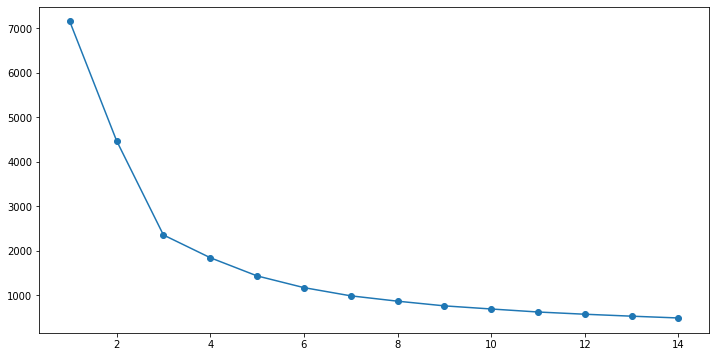

In [94]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

## Dendograms for finding out best number of clusters 

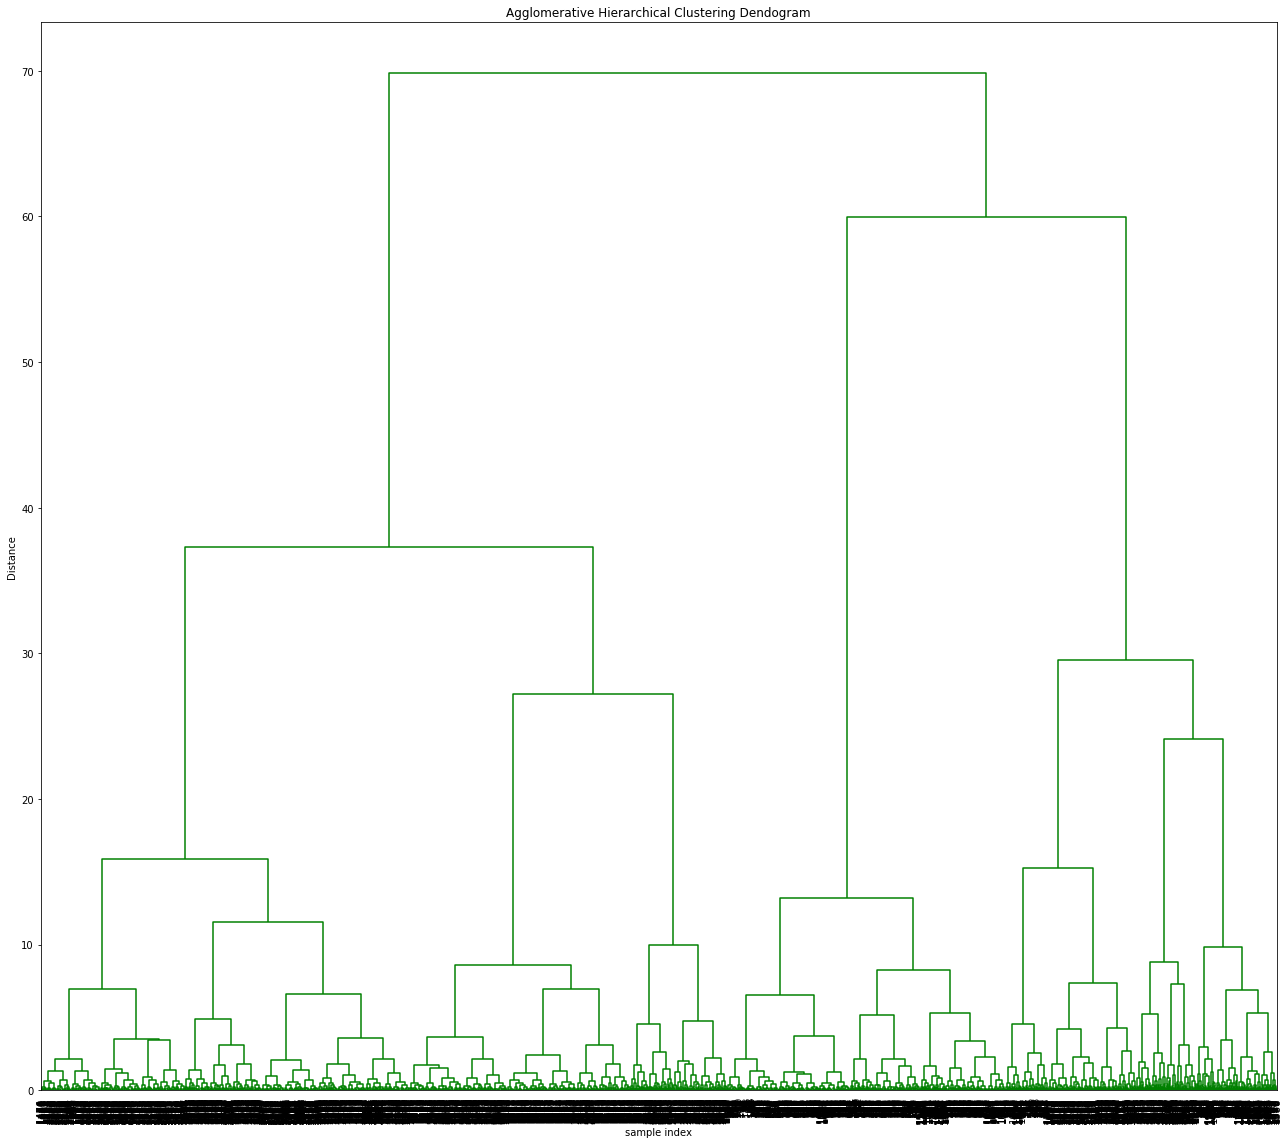

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(cluster1, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## Applying Kmeans

In [96]:
kmeans = KMeans(n_clusters=4,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(cluster1)
# Getting the cluster labels
labels = kmeans.predict(cluster1)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.86625469  1.69234115]
 [ 0.8661234  -0.5085915 ]
 [-0.86749761 -0.43783681]
 [ 0.83035273  1.42981133]]


In [97]:
labels

array([2, 2, 2, ..., 1, 3, 3], dtype=int32)

In [98]:
cluster['Kmeanslabels']=labels

In [99]:
cluster['Kmeanslabels'].value_counts()

2    1373
1    1368
3     430
0     403
Name: Kmeanslabels, dtype: int64

## Applying AgglomerativeClustering

In [100]:
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')

In [101]:
model2.fit(cluster1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [102]:
labels1=model2.labels_

In [103]:
len(labels1)

3574

In [104]:
cluster['Agglolabels']=labels1

## To see the distribution or count of clusters

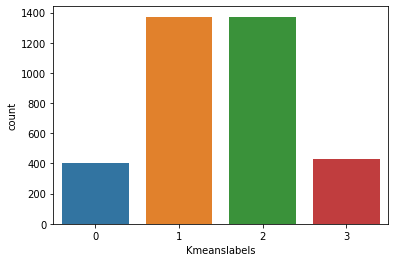

In [105]:
sns.countplot(cluster['Kmeanslabels'])
plt.show()

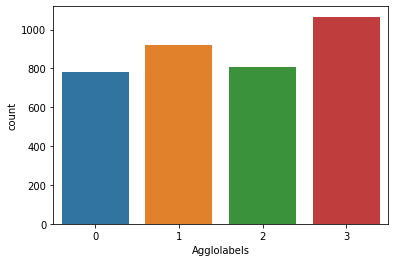

In [106]:
sns.countplot(cluster['Agglolabels'])
plt.show()